<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,94.758606,55.870779,-0.010473,160.618913,160.622104,-0.003192
1,0.0,1.0,33.829755,87.582591,-0.061135,131.351212,131.393512,-0.042300
2,0.0,2.0,32.685058,23.082044,0.064989,65.832091,65.791152,0.040939
3,0.0,3.0,81.956361,25.637889,-0.032953,117.561297,117.608971,-0.047674
4,0.0,4.0,25.603669,90.352999,-0.037615,125.919054,125.937275,-0.018221
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,56.745153,98.587872,-0.116481,165.216544,165.273888,-0.057343
19996,999.0,16.0,66.088152,98.607119,0.009230,174.704500,174.629052,0.075448
19997,999.0,17.0,72.000153,82.966215,-0.046895,164.919473,164.909534,0.009939
19998,999.0,18.0,61.488781,47.347843,-0.238021,118.598603,118.819285,-0.220682


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    94.758606  55.870779 -0.010473  160.618913  160.622104 -0.003192
      1.0    33.829755  87.582591 -0.061135  131.351212  131.393512 -0.042300
      2.0    32.685058  23.082044  0.064989   65.832091   65.791152  0.040939
      3.0    81.956361  25.637889 -0.032953  117.561297  117.608971 -0.047674
      4.0    25.603669  90.352999 -0.037615  125.919054  125.937275 -0.018221
...                ...        ...       ...         ...         ...       ...
999.0 15.0   56.745153  98.587872 -0.116481  165.216544  165.273888 -0.057343
      16.0   66.088152  98.607119  0.009230  174.704500  174.629052  0.075448
      17.0   72.000153  82.966215 -0.046895  164.919473  164.909534  0.009939
      18.0   61.488781  47.347843 -0.238021  118.598603  118.819285 -0.220682
      19.0   88.190521  70.412279 -0.096563  168.506237  168.544844 -0.038607

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    94.758606  55.870779 -0.010473  160.618913  160.622104 -0.003192
      1.0    33.829755  87.582591 -0.061135  131.351212  131.393512 -0.042300
      2.0    32.685058  23.082044  0.064989   65.832091   65.791152  0.040939
      3.0    81.956361  25.637889 -0.032953  117.561297  117.608971 -0.047674
      4.0    25.603669  90.352999 -0.037615  125.919054  125.937275 -0.018221
...                ...        ...       ...         ...         ...       ...
999.0 15.0   56.745153  98.587872 -0.116481  165.216544  165.273888 -0.057343
      16.0   66.088152  98.607119  0.009230  174.704500  174.629052  0.075448
      17.0   72.000153  82.966215 -0.046895  164.919473  164.909534  0.009939
      18.0   61.488781  47.347843 -0.238021  118.598603  118.819285 -0.220682
      19.0   88.190521  70.412279 -0.096563  168.506237  168.544844 -0.038607

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,94.758606,55.870779,-0.010473,160.618913,160.622104,-0.003192
1,0.0,1.0,33.829755,87.582591,-0.061135,131.351212,131.393512,-0.042300
2,0.0,2.0,32.685058,23.082044,0.064989,65.832091,65.791152,0.040939
3,0.0,3.0,81.956361,25.637889,-0.032953,117.561297,117.608971,-0.047674
4,0.0,4.0,25.603669,90.352999,-0.037615,125.919054,125.937275,-0.018221
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,56.745153,98.587872,-0.116481,165.216544,165.273888,-0.057343
19996,999.0,16.0,66.088152,98.607119,0.009230,174.704500,174.629052,0.075448
19997,999.0,17.0,72.000153,82.966215,-0.046895,164.919473,164.909534,0.009939
19998,999.0,18.0,61.488781,47.347843,-0.238021,118.598603,118.819285,-0.220682


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    94.758606  55.870779 -0.010473  160.618913  160.622104 -0.003192
      1.0    33.829755  87.582591 -0.061135  131.351212  131.393512 -0.042300
      2.0    32.685058  23.082044  0.064989   65.832091   65.791152  0.040939
      3.0    81.956361  25.637889 -0.032953  117.561297  117.608971 -0.047674
      4.0    25.603669  90.352999 -0.037615  125.919054  125.937275 -0.018221
...                ...        ...       ...         ...         ...       ...
999.0 15.0   56.745153  98.587872 -0.116481  165.216544  165.273888 -0.057343
      16.0   66.088152  98.607119  0.009230  174.704500  174.629052  0.075448
      17.0   72.000153  82.966215 -0.046895  164.919473  164.909534  0.009939
      18.0   61.488781  47.347843 -0.238021  118.598603  118.819285 -0.220682
      19.0   88.190521  70.412279 -0.096563  168.506237  168.544844 -0.038607

[20000 rows x 6 columns]

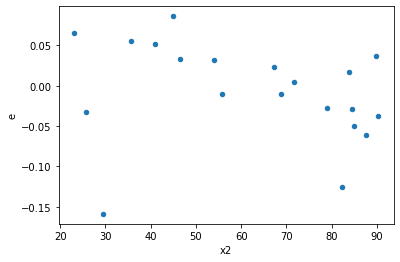

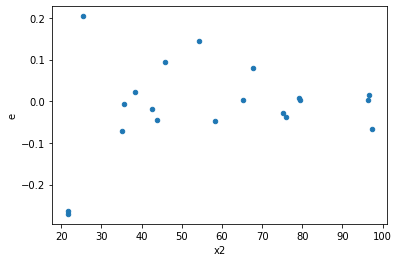

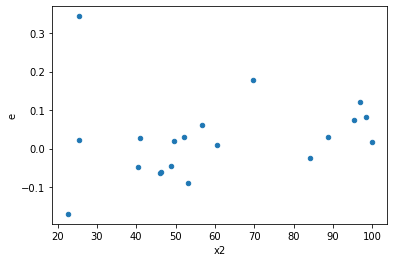

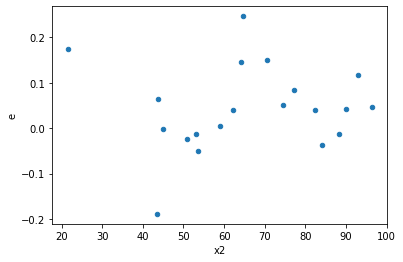

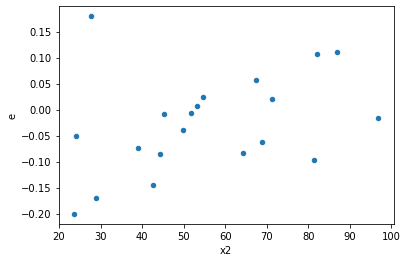

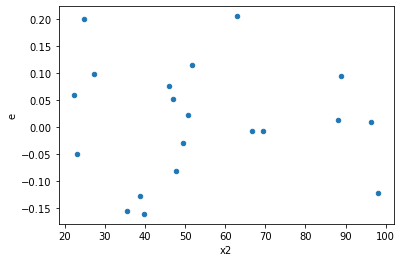

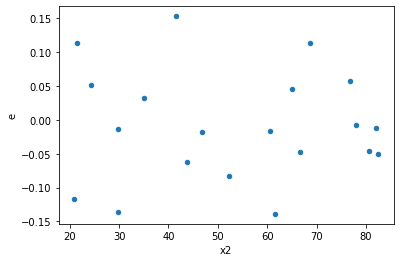

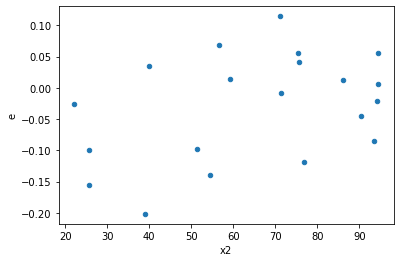

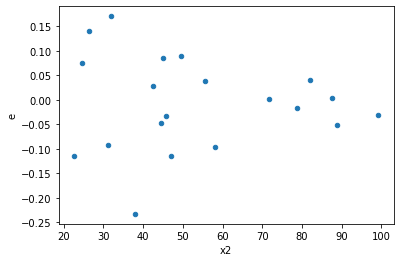

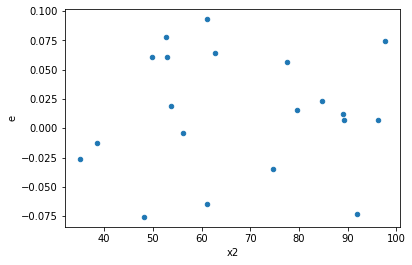

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,8.0,8.0,0.014961941505761302,0.14306490838142638,0.0018702426882201628,0.017883113547678298,9.561921380747096,0.0044449820607932455,0.9977775089696034,0.0022224910303966228,Reject005=0 : Heteroscedasticity
2.0,13.0,3.0,0.04928765822403953,0.04646113332969637,0.0037913583249261176,0.015487044443232123,4.08482741961192,0.2729278103124324,0.8635360948437838,0.1364639051562162,Reject005=1 : Homoscedasticity
4.0,7.0,9.0,0.04597298524243861,0.09421348732613231,0.006567569320348373,0.010468165258459146,1.5939177415342254,0.5045092787555676,0.7477453606222162,0.2522546393777838,Reject005=1 : Homoscedasticity
5.0,9.0,7.0,0.06606888330495288,0.11797385210958804,0.007340987033883653,0.01685340744422686,2.2957958332356276,0.28596218282565555,0.8570189085871722,0.14298109141282778,Reject005=1 : Homoscedasticity
6.0,13.0,3.0,0.07952949373706834,0.041562409710733966,0.006117653364389872,0.013854136570244655,2.2646161436487926,0.545590216773356,0.727204891613322,0.272795108386678,Reject005=1 : Homoscedasticity
9.0,5.0,11.0,0.01061083994090086,0.023021334008664816,0.0021221679881801717,0.002092848546242256,0.9861842030879666,0.9367962275830295,0.5316018862084853,0.46839811379151475,Reject005=1 : Homoscedasticity
10.0,12.0,4.0,0.029409896652834708,0.035821713433292796,0.002450824721069559,0.008955428358323199,3.65404685261008,0.22131936782358053,0.8893403160882097,0.11065968391179026,Reject005=1 : Homoscedasticity
11.0,5.0,11.0,0.010863743907238854,0.16945313756935276,0.0021727487814477706,0.015404830688122978,7.0900192510329045,0.006829820654849383,0.9965850896725753,0.0034149103274246917,Reject005=0 : Heteroscedasticity
12.0,5.0,11.0,0.017561397879740773,0.05888922325770412,0.0035122795759481547,0.0053535657507003745,1.5242424855245633,0.5196388374565151,0.7401805812717425,0.25981941872825753,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,5.0,0.04928598566524252,0.01463400879240033,0.004480544151385684,0.002926801758480066,0.653224621740398,0.5159230692105423,Reject005=1 : Homoscedasticity
1.0,8.0,8.0,0.014961941505761302,0.14306490838142638,0.0018702426882201628,0.017883113547678298,9.561921380747096,0.0044449820607932455,Reject005=0 : Heteroscedasticity
2.0,13.0,3.0,0.04928765822403953,0.04646113332969637,0.0037913583249261176,0.015487044443232123,4.08482741961192,0.2729278103124324,Reject005=1 : Homoscedasticity
3.0,11.0,5.0,0.06764265559354747,0.005608251557705215,0.006149332326686133,0.001121650311541043,0.18240196690516136,0.01791978050098688,Reject005=0 : Heteroscedasticity
4.0,7.0,9.0,0.04597298524243861,0.09421348732613231,0.006567569320348373,0.010468165258459146,1.5939177415342254,0.5045092787555676,Reject005=1 : Homoscedasticity
5.0,9.0,7.0,0.06606888330495288,0.11797385210958804,0.007340987033883653,0.01685340744422686,2.2957958332356276,0.28596218282565555,Reject005=1 : Homoscedasticity
6.0,13.0,3.0,0.07952949373706834,0.041562409710733966,0.006117653364389872,0.013854136570244655,2.2646161436487926,0.545590216773356,Reject005=1 : Homoscedasticity
7.0,10.0,6.0,0.07351837001867353,0.03470271874827441,0.0073518370018673534,0.005783786458045735,0.7867130972268106,0.7018837627278373,Reject005=1 : Homoscedasticity
8.0,5.0,11.0,0.09971681254749176,0.056676538316631754,0.019943362509498352,0.00515241257423925,0.2583522498668582,0.14671535724237628,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      783
Reject005=0 : Heteroscedasticity    217
Name: Result_test, dtype: int64